# Importing the required libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import metrics
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# Reading the given Dataset

In [8]:
df=pd.read_csv('Fraud.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Performing Exploratory Data Analysis on the given Dataset

Performing Exploratory Data Analysis on the given Dataset to find out the correlation among the different data fields and to perform data cleaning accordingly.

In [9]:
#Countplot of "isFraud"

#sns.set_style('whitegrid')
#sns.countplot(x='isFraud',hue='type',data=df,palette='RdBu_r')

In [10]:
#Countplot of "isFlaggedFraud"

#sns.set_style('whitegrid')
#sns.countplot(x='isFlaggedFraud',hue='type',data=df,palette='RdBu_r')

In [11]:
#Jointplot between "isFraud" and "type"

#sns.jointplot(x='isFraud',y='type',data=df)

In [12]:
#Finding number of cases where "isFraud" is set to 1

df.groupby(['type', 'isFraud']).count()['step']

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: step, dtype: int64

In [13]:
#Finding number of cases where "isFlaggedFraud" is set to 1


df.groupby(['type', 'isFlaggedFraud']).count()['step']

type      isFlaggedFraud
CASH_IN   0                 1399284
CASH_OUT  0                 2237500
DEBIT     0                   41432
PAYMENT   0                 2151495
TRANSFER  0                  532893
          1                      16
Name: step, dtype: int64

In [14]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


# Converting "type" to integer variables

Here as we can see that "isFraud" is set to 1 only in cases of "TRANSFER" and "CASH_OUT" transactions, we set them to 0 and 1 respectively. Also we drop the unrequired data fields, that are required

In [15]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

y = X['isFraud']
#del X['isFraud']

def converter(type_bin):
    if(type_bin=='TRANSFER'):
        return 0
    else:
        return 1
X['type_bin']=X['type'].apply(converter)

X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','type'], axis = 1)

C:\Users\Argha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [16]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_bin
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,1
15,1,229133.94,15325.00,0.00,5083.00,51513.44,0,1
19,1,215310.30,705.00,0.00,22425.00,0.00,0,0
24,1,311685.89,10835.00,0.00,6267.00,2719172.89,0,0
42,1,110414.71,26845.41,0.00,288800.00,2415.16,0,1
47,1,56953.90,1942.02,0.00,70253.00,64106.18,0,1
48,1,5346.89,0.00,0.00,652637.00,6453430.91,0,1
51,1,23261.30,20411.53,0.00,25742.00,0.00,0,1
58,1,62610.80,79114.00,16503.20,517.00,8383.29,0,0


# Countplotting isFraud for TRANSFER and CASH_OUT without Sampling

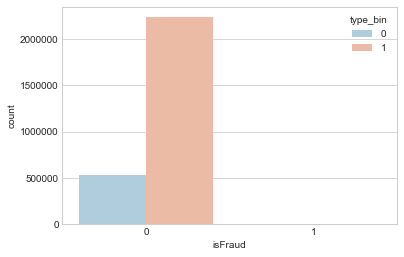

In [17]:
sns.countplot(x='isFraud',hue='type_bin',data=X,palette='RdBu_r')

# Splitting The Data Into Train And Test Data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [19]:
lm=LogisticRegression()

In [20]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictions=lm.predict(X_test)

In [22]:
#Printing Classification report,recall score,confusion matrix 

In [23]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    828589
          1       0.49      0.43      0.46      2534

avg / total       1.00      1.00      1.00    831123



In [24]:
print(confusion_matrix(y_test,predictions))

[[827472   1117]
 [  1446   1088]]


In [25]:
print(recall_score(y_test,predictions))

0.4293606945540647


In [58]:
print(accuracy_score(y_test,predictions))

0.9969162205834756


# ROC Curve for Logistic Regression without Sampling on Data

In [26]:
probs = lm.predict_proba(X_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
roc_auc = metrics.roc_auc_score(y_test, probs)

Text(0,0.5,'True Positive Rate')

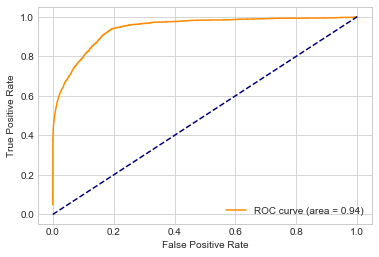

In [27]:
plt.plot(fpr, tpr, color = 'darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Sampling of Data 

In [28]:
no_frauds=len(X[X['isFraud']==1])

In [29]:
non_fraud_indices=X[X.isFraud==0].index

In [30]:
random_indices=np.random.choice(non_fraud_indices,no_frauds,replace=False)

In [31]:
fraud_indices=X[X.isFraud==1].index

In [32]:
under_sample_indices=np.concatenate([fraud_indices,random_indices])

In [33]:
under_sample=X.loc[under_sample_indices]

# Countplotting isFraud for TRANSFER and CASH_OUT after Sampling

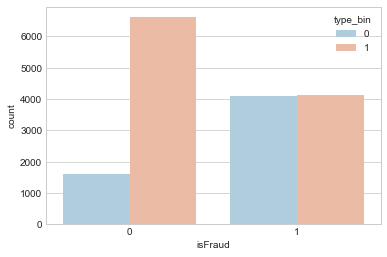

In [34]:
sns.countplot(x='isFraud',hue='type_bin',data=under_sample,palette='RdBu_r')

In [35]:
X_under=under_sample.loc[:,under_sample.columns!='isFraud']
y_under=under_sample.loc[:,under_sample.columns=='isFraud']
X_under_train,X_under_test,y_under_train,y_under_test=train_test_split(X_under,y_under,test_size=0.3,random_state=101)

lr_under=LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred=lr_under.predict(X_under_test)

C:\Users\Argha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#Printing Classification report,recall score,confusion matrix 

In [37]:
print(classification_report(y_under_test,y_under_pred))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92      2444
          1       0.89      0.97      0.93      2484

avg / total       0.93      0.93      0.93      4928



In [38]:
print(confusion_matrix(y_under_test,y_under_pred))

[[2155  289]
 [  68 2416]]


In [39]:
print(recall_score(y_under_test,y_under_pred))

0.9726247987117552


In [59]:
print(accuracy_score(y_under_test,y_under_pred))

0.9275568181818182


# ROC Curve For Logistic Regression After Sampling

In [40]:
probs = lr_under.predict_proba(X_under_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_under_test, probs)
roc_auc = metrics.roc_auc_score(y_under_test, probs)

Text(0,0.5,'True Positive Rate')

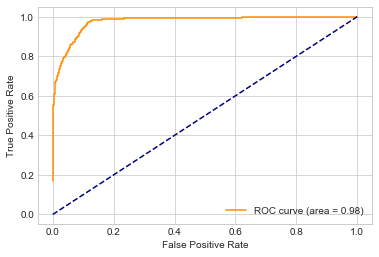

In [41]:
plt.plot(fpr, tpr, color = 'darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Random Forest Model Implementation

In [42]:
rf = RandomForestClassifier(n_estimators =100, n_jobs =4)
rf.fit(X_under_train, y_under_train)
y_rf_pred = rf.predict(X_under_test)
cnf_matrix = confusion_matrix(y_rf_pred, y_under_test)
print (cnf_matrix)

C:\Users\Argha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[2400   31]
 [  44 2453]]


In [43]:
#Printing Classification report,recall score,confusion matrix 

In [44]:
print(classification_report(y_rf_pred,y_under_test))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2431
          1       0.99      0.98      0.98      2497

avg / total       0.98      0.98      0.98      4928



In [60]:
recall_score(y_rf_pred,y_under_test)

0.9823788546255506

In [61]:
accuracy_score(y_rf_pred,y_under_test)

0.9847808441558441

# ROC Curve For Random Forest Implementation

In [46]:
probs = rf.predict_proba(X_under_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_under_test, probs)
roc_auc = metrics.roc_auc_score(y_under_test, probs)

Text(0,0.5,'True Positive Rate')

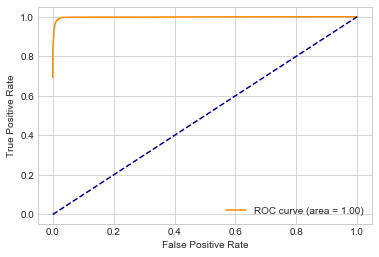

In [47]:
plt.plot(fpr, tpr, color = 'darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Decision Tree  Model Implementation 

In [48]:
dt=DecisionTreeClassifier()

In [49]:
dt.fit(X_under_train,y_under_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
pred=dt.predict(X_under_test)

In [51]:
#Printing Classification report,recall score,confusion matrix 

In [52]:
print(classification_report(y_under_test,pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2444
          1       0.98      0.99      0.99      2484

avg / total       0.99      0.99      0.99      4928



In [62]:
print(confusion_matrix(y_under_test,pred))

[[2402   42]
 [  30 2454]]


In [63]:
print(accuracy_score(y_under_test,pred))

0.9853896103896104


In [54]:
features=list(X_under.columns[:])
features

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'type_bin']

# ROC Curve For Decision Tree Implementation

In [55]:
probs = dt.predict_proba(X_under_test)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(y_under_test, probs)
roc_auc = metrics.roc_auc_score(y_under_test, probs)

Text(0,0.5,'True Positive Rate')

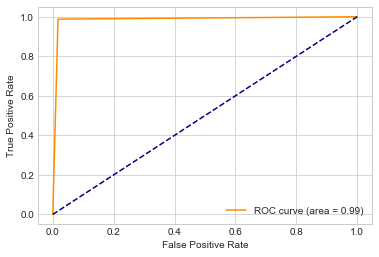

In [56]:
plt.plot(fpr, tpr, color = 'darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Decision Tree 

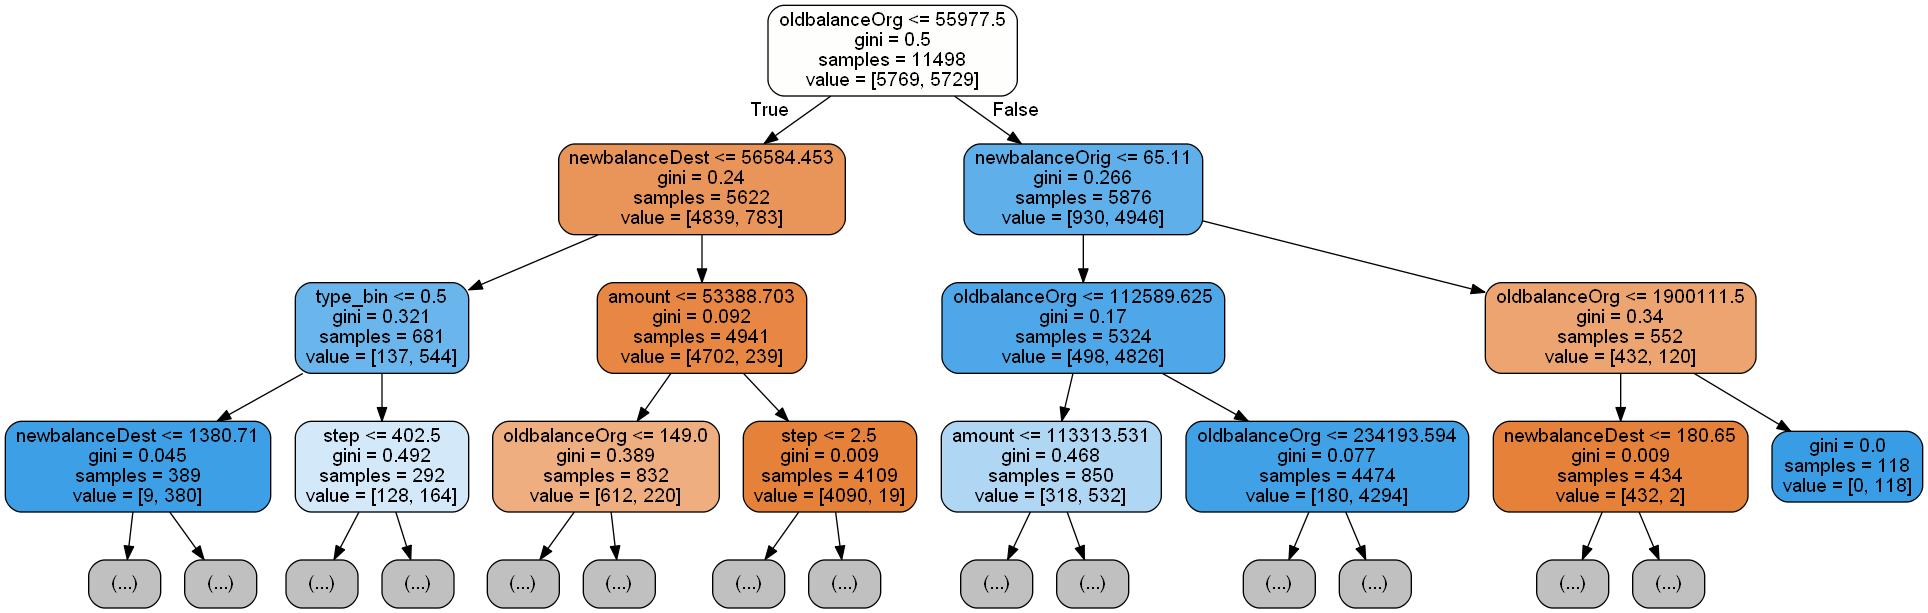

In [57]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,max_depth=3,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())